Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [74]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [76]:
# Read New York City apartment rental listing data
import pandas as pd
import pandas_profiling
import seaborn as sns

df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2016-06-12 12:19:27,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,41,-74,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,41,-74,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,41,-74,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Get Pandas Profiling Report
#df.profile_report()

In [78]:
# Take a closer look at our target - price
pd.options.display.float_format = '{:,.0f}'.format
df['price'].describe()

count      49,352
mean        3,830
std        22,067
min            43
25%         2,500
50%         3,150
75%         4,100
max     4,490,000
Name: price, dtype: float64

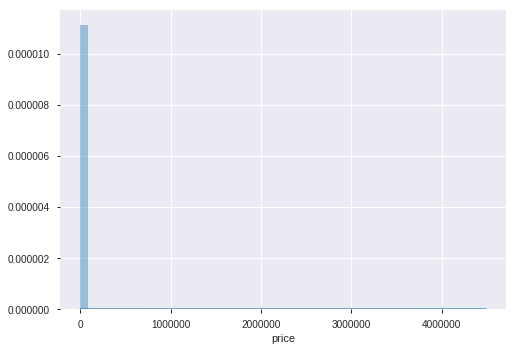

In [79]:
sns.distplot(df['price'])

In [80]:
# A price under $400 per month is likely an outlier at the low end.
df.query('price < 400')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
28626,1,0,2016-05-24 05:24:56,<p><a website_redacted,Madison,41,-74,43,60 Madison,low,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
43824,1,0,2016-04-02 02:43:15,<p><a website_redacted,W 30th St.,41,-74,45,140 W 30th St.,low,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
# A price over $10,000 per month is realistic for luxury rentals,
# but with only 744 out of 49,000+ we can eliminate as outliers.
df.query('price > 10000')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
41,3,4,2016-04-12 05:21:21,Ultimate luxury in the sky ! conv. 4 bedrooms ...,E 79,41,-74,15000,350 E 79,low,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0
85,4,4,2016-04-09 04:08:44,"Kitchens: GE Profile 36 Cook-top, Stainless St...",East 86th Street,41,-74,13500,201 East 86th Street,low,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
149,1,3,2016-04-15 04:32:14,Get one one month free on a 13 month lease! Th...,E 74 Street,41,-74,13500,501 E 74 Street,low,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0
205,2,3,2016-04-13 02:29:37,CooperCooper.com :: Listing ID #6AA.6001; Acce...,West 23rd Street,41,-74,15500,60 West 23rd Street,low,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
317,3,3,2016-04-14 05:26:29,"Brand new three bedroom, three bathroom 2000 s...",5th Ave.,41,-74,14000,99 5th Ave.,low,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
366,3,5,2016-06-08 14:27:49,SPECTACULAR NEWLY RENOVATED 5-BEDROOM & 3-BATH...,MASSIVE 5BED/3BATH* PANORAMIC BK VIEWS* 2000SQFT,41,-74,11257,254 Front street,low,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
368,2,2,2016-04-08 05:57:29,Be the first to live in this extraordinary apa...,W 64th St.,41,-74,13000,20 W 64th St.,low,1,0,1,0,1,1,1,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0
371,3,3,2016-04-07 05:34:51,Perfect UWS location near Central Park & Linco...,Broadway,41,-74,15000,1930 Broadway,low,1,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
420,3,3,2016-04-11 02:49:08,"INCREDIBLE, Rare Deal for a Luxury, white glov...",E 34th St.,41,-74,11077,222 E 34th St.,low,1,1,1,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0
538,2,3,2016-04-08 05:51:50,Upper East side Luxurious building! Experience...,E 90th St.,41,-74,11500,170 E 90th St.,low,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
mask = (df['price'] > 400) & (df['price'] < 10000)
df = df[mask]
print(df.shape)
df.head()

(48372, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2016-06-12 12:19:27,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,41,-74,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,41,-74,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,41,-74,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


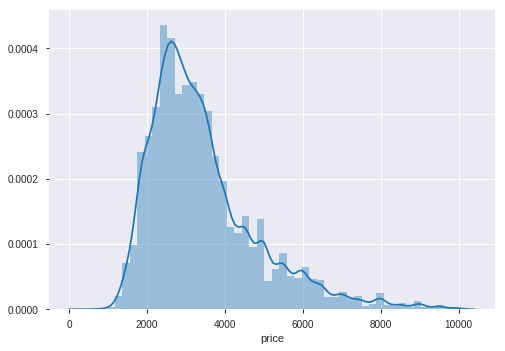

In [83]:
sns.distplot(df['price'])

In [84]:
# Take a closer look at our longitude
df['longitude'].describe()

count   48,372
mean       -74
std          1
min       -118
25%        -74
50%        -74
75%        -74
max          0
Name: longitude, dtype: float64

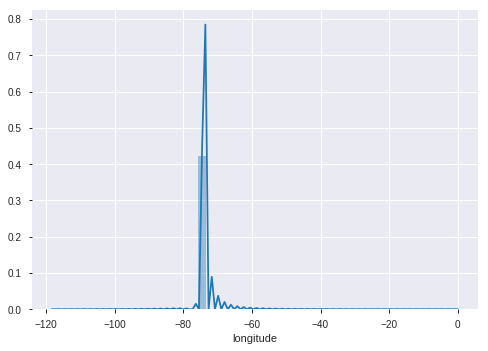

In [85]:
sns.distplot(df['longitude'])

In [86]:
# longitudes should be in -74 these are outliers
df.query('longitude < -75 or longitude > -73')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
2150,1,0,2016-04-16 02:10:48,NEWLY RENOVATED BEAUTIFUL SPACIOUS HUGE STUDIO...,"E 46th St,",40,-86,2650,"235 E 46th St,",low,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2787,5,6,2016-04-18 02:14:51,***NO BROKER FEE***<BR><BR>Situated on a gorge...,Decatur Street,0,0,9995,259 Decatur Street,low,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6153,1,1,2016-04-07 01:41:55,Come for the studio apartment but stay for all...,Modern Studio in Amenity Filled 24 Hr. DM Bldg.,40,-76,2895,271 West 47TH Street,low,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6546,2,2,2016-04-21 04:36:16,T_208-421-1596<br />kagglemanager@rent...,550 Liberty Street,42,-71,2541,550 Liberty Street,low,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7620,1,1,2016-04-06 13:27:48,"One BHK apartment is on rent from 20th April, ...",176 Presidents lane,42,-71,1670,"176 Presidents lane,Quincy,MA",low,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12387,1,0,2016-06-22 23:17:24,NaN,Riverside Dr/ 90 Street,45,-75,1350,Riverside Dr/ 90 Street,medium,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
13234,1,2,2016-06-29 02:30:45,"Huge bedrooms, windows in every room! Hard woo...",1st Ave. Loop,43,-77,3300,250 1st Ave. Loop,low,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14104,1,1,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn",0,0,1750,145 28 Street,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16072,1,1,2016-06-12 03:46:05,Stunning one bedroom apartment with dr...,56 St. Botolph Street,42,-71,4123,56 St. Botolph Street,low,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21715,1,1,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,0,0,1725,Van Sicklen street,low,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
mask = (df['longitude'] > -75) & (df['longitude'] < -73)
df = df[mask]
print(df.shape)
df.head()

(48344, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2016-06-12 12:19:27,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,41,-74,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,41,-74,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,41,-74,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# Take a closer look at our latitude
df['latitude'].describe()

count   48,344
mean        41
std          0
min         40
25%         41
50%         41
75%         41
max         43
Name: latitude, dtype: float64

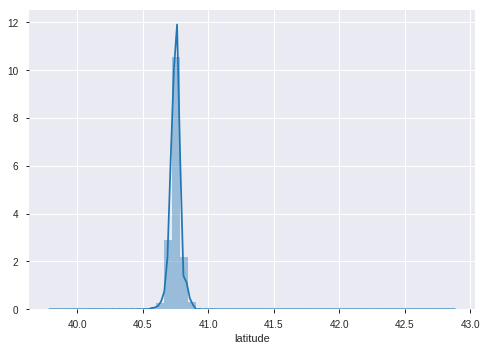

In [91]:
sns.distplot(df['latitude'])

In [92]:
# Take a closer look at bedrooms
df['bedrooms'].describe()

count   48,344
mean         2
std          1
min          0
25%          1
50%          1
75%          2
max          8
Name: bedrooms, dtype: float64

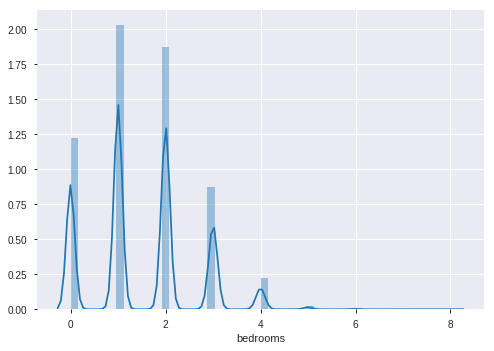

In [94]:
sns.distplot(df['bedrooms'])

In [93]:
# Greater than 5 bedrooms is unusual
df.query('bedrooms > 5')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
1943,4,6,2016-04-29 06:30:33,Queen Size BedroomsEbony Hardwood FloorsRecess...,East 75th Street,41,-74,9000,339 East 75th Street,low,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2089,3,7,2016-04-06 02:23:53,** NO FEE** Available immediately -This is a r...,1193 Bergen Street,41,-74,6923,1193 Bergen Street,medium,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3740,3,6,2016-04-19 05:40:00,"NO FEE!!!, Fantastic for sharing, bright 6 Bed...",West 107th Street,41,-74,8000,230 West 107th Street,medium,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5747,4,8,2016-06-25 06:09:20,Gorgeous 8 bedroom Duplex/4 full bathroom w/ ...,Greene Ave,41,-74,6500,393 Greene Ave,low,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8295,3,6,2016-04-06 07:08:32,*Bedrooms furnished with desk and bunk beds *L...,Madison Avenue,41,-74,9635,118 Madison Avenue,low,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
12206,4,6,2016-06-04 05:34:54,"This is a Brand New, Gut Renovated Large 6 Bed...",East 75th Street,41,-74,9000,339 East 75th Street,low,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
13003,2,6,2016-06-03 03:01:31,Gut Renovated 6 bedroom 2 bathroom apartment w...,W 105th St.,41,-74,7500,106 W 105th St.,low,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
14356,4,6,2016-06-08 02:10:53,"Apartment features king size six bedroom, four...","E 70th St,",41,-74,8722,"226 E 70th St,",low,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14598,4,6,2016-06-01 06:07:31,"Unique and rare 6 bedroom, 4 bath apartment wi...",E 70th St,41,-74,7600,226 E 70th St,low,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14797,2,6,2016-06-12 13:34:10,,West 105th Street,41,-74,7500,106 West 105th Street,low,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
mask = (df['bedrooms'] < 6)
df = df[mask]
print(df.shape)
df.head()

(48305, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2016-06-12 12:19:27,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,41,-74,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,41,-74,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,41,-74,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
# Take a closer look at bedrooms
df['bathrooms'].describe()

count   48,305
mean         1
std          0
min          0
25%          1
50%          1
75%          1
max         10
Name: bathrooms, dtype: float64

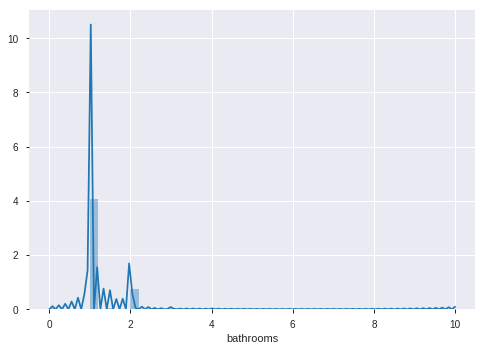

In [99]:
sns.distplot(df['bathrooms'])

In [102]:
# Greater than 4 bathrooms is unusual
df.query('bathrooms > 4')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
1990,10,2,2016-04-09 04:34:31,***The building?s well-attended lobby welcomes...,W 52 St.,41,-74,3600,260 W 52 St.,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6014,4,1,2016-04-29 03:44:34,This historical elevator building is located o...,Fort Washington Avenue,41,-74,2050,690 Fort Washington Avenue,low,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
mask = (df['bathrooms'] < 5)
df = df[mask]
print(df.shape)
df.head()

(48304, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2016-06-12 12:19:27,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,41,-74,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,41,-74,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,41,-74,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
